# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
from random import choice

def dice(r):
    roll_list = []
    rolls = 1
    while rolls <= r :
        roll_list.append(choice([1,2,3,4,5,6]))
        rolls += 1
    return roll_list

simulate = dice(10)
results = pd.DataFrame(simulate, columns=['Value'])
results['Roll'] = range(1,11)
results = results[['Roll', 'Value']]
results

,Roll,Value
0,1,5
1,2,3
2,3,3
3,4,2
4,5,1
5,6,3
6,7,3
7,8,2
8,9,3
9,10,3


#### 2.- Plot the results sorted by value.

In [3]:
# your code here
results = results.sort_values(by=['Value']).reset_index(drop=True)
results

,Roll,Value
0,5,1
1,4,2
2,8,2
3,2,3
4,3,3
5,6,3
6,7,3
7,9,3
8,10,3
9,1,5


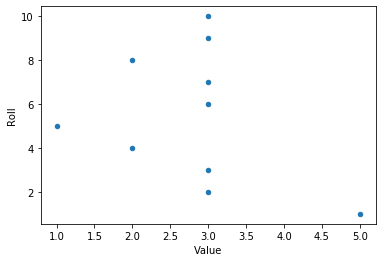

In [4]:
results.plot.scatter('Value','Roll')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [5]:
# your code here
freqs = results.groupby('Value').count().reset_index()
freqs

,Value,Roll
0,1,1
1,2,2
2,3,6
3,5,1


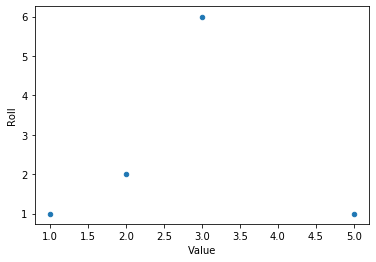

In [6]:
freqs.plot.scatter('Value','Roll')

In [7]:
"""
The plots have the same distribution but in the frequency one there only one occurrence per result.
"""

'\nThe plots have the same distribution but in the frequency one there only one occurrence per result.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def mean_s(lst):
    c = 0
    for i in lst:
        c += i
    m = c/len(lst)
    return m

In [9]:
mean_s(simulate)

2.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
# your code here
mean_s(freqs['Roll'])

2.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [11]:
# your code here
def median_s(lst):
    lst.sort()
    l = len(lst)
    if l % 2 == 0 :
        md = int((lst[int(l/2)] + lst[int((l/2)-1)]) / 2)      
    elif l % 2 == 1 :
        md = lst[int((l-1)/2)]
    return md

In [12]:
median_s(simulate)

3

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
# your code here
def quartiles_s(lst,q):
    lst.sort()
    l = len(lst)
    md = lst[round((l+1)*q)-1]
    return md

In [14]:
quartiles_s(simulate,0.25)

2

In [15]:
quartiles_s(simulate,0.75)

3

In [16]:
# the quartile 0.5 is the same as the median

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [17]:
# your code here
data = pd.read_csv('../data/roll_the_dice_hundred.csv')
data.head(10)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


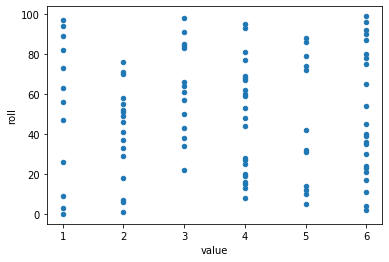

In [18]:
data.plot.scatter('value','roll')

In [19]:
"""
The 100 rolls seem evenly distributed among the 6 sides of the dice, except in side 1 that has less occurrences.
"""

'\nThe 100 rolls seem evenly distributed among the 6 sides of the dice, except in side 1 that has less occurrences.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [20]:
# your code here
mean_s(data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [21]:
# your code here
data_freq = data.sort_values(by=['value']).reset_index(drop=True)
data_freq = data_freq[['roll', 'value']]
data_freq = data_freq.groupby('value').count().reset_index()
data_freq.head(6)

,value,roll
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

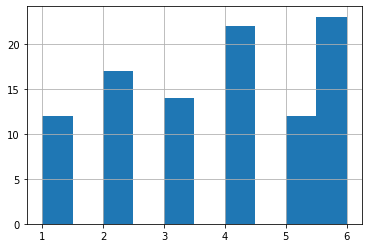

In [22]:
# your code here
data = data[['roll', 'value']]
data['value'].hist()

In [23]:
"""
The size of the bars represent the frequency of each value of the dice on the 100 rolls.
The mean of 3.7 is in the middle of the total blue area.
"""

'\nThe size of the bars represent the frequency of each value of the dice on the 100 rolls.\nThe mean of 3.7 is in the middle of the total blue area.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [24]:
# your code here
data3 = pd.read_csv('../data/roll_the_dice_thousand.csv')
data3.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


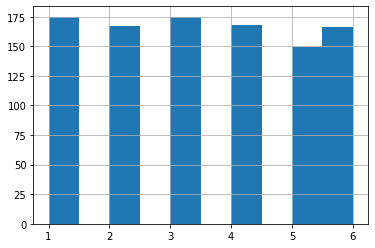

In [25]:
data3 = data3[['roll', 'value']]
data3['value'].hist()

In [26]:
"""
As the number of rolls increased a lot (100 times),
the frequency of each value is now more similar,
because the probability of having each value is higher.
"""

'\nAs the number of rolls increased a lot (100 times), the frequency of each value is now more similar, because the probability of having each value is higher.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [27]:
# your code here
ages1 = pd.read_csv('../data/ages_population.csv')
ages1.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [54]:
ages1_freq = ages1.sort_values(by='observation').reset_index(drop=True)
ages1_freq['times'] = range(1,1001)
ages1_freq = ages1_freq.groupby('observation').agg({'times':'count'}).reset_index()
ages1_freq.head()

,observation,times
0,1.0,2
1,2.0,2
2,4.0,1
3,5.0,2
4,6.0,2


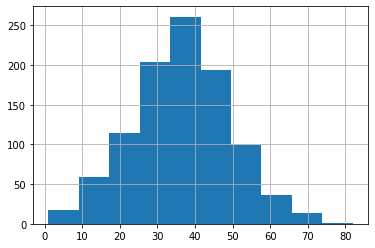

In [55]:
ages1['observation'].hist()

In [59]:
"""
The mean should be around 35 and the std should be between 25-50
"""

'\nThe mean should be around 35 and the std should be between 25-50\n'


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [56]:
# your code here
np.mean(ages1)

observation    36.56
dtype: float64

In [58]:
np.std(ages1)

observation    12.81009
dtype: float64

In [30]:
"""
Yes the exact values are close to what I've guessed.
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [67]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [68]:
ages2_freq = ages2.sort_values(by='observation').reset_index(drop=True)
ages2_freq['times'] = range(1,1001)
ages2_freq = ages2_freq.groupby('observation').agg({'times':'count'}).reset_index()
ages2_freq.head()

,observation,times
0,19.0,3
1,20.0,13
2,21.0,17
3,22.0,35
4,23.0,41


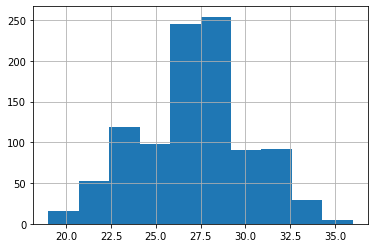

In [69]:
ages2['observation'].hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [32]:
"""
The data is now only in the range of 17.5-37.5 years and the distribution is much more centered (in 26-29).
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [71]:
# your code here
np.mean(ages2)

observation    27.155
dtype: float64

In [72]:
np.std(ages2)

observation    2.968329
dtype: float64

In [73]:
"""
As expected the mean is lower (as the range moved left)
and the std is also lower because the distribution is more centered (less spread).
"""

'\nAs expected the mean is lower (as the range moved left) and the std is also lower because the distribution is more centered (less spread).\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [76]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


In [96]:
ages3_freq = ages3.sort_values(by='observation').reset_index(drop=True)
ages3_freq['times'] = range(1,1001)
ages3_freq = ages3_freq.groupby('observation').agg({'times':'count'}).reset_index()
ages3_freq.head()

,observation,times
0,1.0,1
1,2.0,2
2,4.0,2
3,5.0,1
4,7.0,1


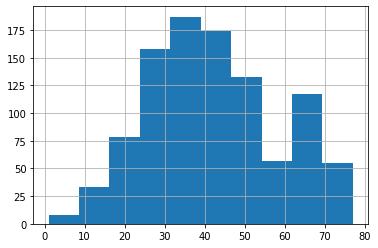

In [78]:
ages3['observation'].hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [85]:
# your code here
np.mean(ages3)

observation    41.989
dtype: float64

In [86]:
np.std(ages3)

observation    16.136632
dtype: float64

In [37]:
"""
The distribution has now a second peak on the right (higher ages),
so the mean value is higher and the std is also higher because the data is not centered.
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [94]:
# your code here
q25 = ages3.quantile(0.25)
q50 = ages3.median()
q75 = ages3.quantile(0.75)
print(q25, q50, q75)

observation    30.0
Name: 0.25, dtype: float64 observation    40.0
dtype: float64 observation    53.0
Name: 0.75, dtype: float64


In [ ]:
"""
Q1 is between 1 and 30 years (gap of 29)
Q2 is between 30 and 40 years (gap of 10)
Q3 is between 40 and 53 years (gap of 13)
Q4 is between 53 and 77 years (gap of 22)
"""

In [99]:
ages3.median()

observation    40.0
dtype: float64

In [39]:
"""
The quartiles have quite different gaps because of the two peaks of the distribution.
The mean is a bit higher that the median because the distribution is moved right due to the second peak.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [100]:
# your code here

q10 = ages3.quantile(0.1)
q20 = ages3.quantile(0.2)
q30 = ages3.quantile(0.3)
q40 = ages3.quantile(0.4)

q60 = ages3.quantile(0.6)
q70 = ages3.quantile(0.7)
q80 = ages3.quantile(0.8)
q90 = ages3.quantile(0.9)

print(q10,q20,q30,q40,q60,q70,q80,q90)

observation    22.0
Name: 0.1, dtype: float64 observation    28.0
Name: 0.2, dtype: float64 observation    32.0
Name: 0.3, dtype: float64 observation    36.0
Name: 0.4, dtype: float64 observation    45.0
Name: 0.6, dtype: float64 observation    50.0
Name: 0.7, dtype: float64 observation    57.0
Name: 0.8, dtype: float64 observation    67.0
Name: 0.9, dtype: float64


In [ ]:
"""
P1 1-22 (gap 21)
P2 22-28 (gap 6)
P3 28-32 (gap 4)
P4 32-36 (gap 4)
P5 36-40 (gap 4)
P6 40-45 (gap 5)
P7 45-50 (gap 5)
P8 50-57 (gap 7)
P9 57-67 (gap 7)
P10 67-77 (gap 20)
"""

In [41]:
"""
Calculating the percentiles we can see that there is no much difference on the gap between the middle ones and the right ones,
indicating that the distribution is skewed right.
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [42]:
# your code here

In [43]:
"""
your comments here
"""

'\nyour comments here\n'